In [739]:
import csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

sns.set_theme()
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=2)

# Функции для форматирования и вывода данных

In [656]:
def print_results(test_type):
    txt_path = f"./txt_{test_type}/{test_type}.txt"
    csv_path = f"./txt_{test_type}/{test_type}.csv"

#     with open(txt_path, "r") as txt_file:
#         for row in txt_file:
#             if row.startswith(test_type):
#                 print(row, end="")
        
#     print()

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            mean = sum(a)/len(a)
            xmin = min(a)
            xmax = max(a)
            
            print(f'{timestr}\n{a}\nmean = {mean}\nmin = {xmin}\nmax = {xmax}\n')
    
# print_results("barrier")
# print(f"\n{'-' * 70}\n")
# print_results("alltoall")

In [657]:
def get_logs(test_type):
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        data = {}
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            data[timestr] = a
        return data

In [658]:
def get_data_from_logs(all_data, num_key):
    sep_data = {}
    for time in all_data:
        arr = all_data[time]
        num = len(arr)
        if not (num in sep_data):
            sep_data[num] = {}
        sep_data[num][time] = arr


    for d in sep_data.keys():
        print(f"key {d}: {len(sep_data[d])} elements")

    return pd.DataFrame(sep_data[num_key])

In [813]:
# https://seaborn.pydata.org/examples/simple_violinplots.html

def create_plot(data, rot=90, label='время запуска (дата отдельно в логах)', title="", padding = 0.2):
    column_names = data.columns
    # data = data0.drop(columns=column_names[:5]) 
    data_mean = pd.DataFrame(data.mean(axis=0), columns=['mean'])
    
    min_value = 1000
    max_value = 0

    for column_name in data:
        column_min_value = min(data[column_name])
        if (min_value > column_min_value):
            min_value = column_min_value

        column_max_value = max(data[column_name])
        if (max_value < column_max_value):
            max_value = column_max_value

    print(f"min value = {min_value}\nmax value = {max_value}")
    
    sns.violinplot(data=data, palette="light:g", cut=0, inner="point", bw=0.3)
    ax = sns.scatterplot(data=data_mean, palette=['blue'], s=150, markers=['X'])
    ax.set(xlim=(-0.5, len(data.columns) - 0.5),
         ylim=(min_value - padding, max_value + padding), 
         ylabel='время выполнения',
         xlabel=label)

    plt.xticks(rotation=rot)
    plt.title(title)
    plt.show()
    

In [660]:
def merge_data(data, lll, num_key):
    shape0 = 0
    for arr in lll.values():
        shape0 = max(shape0, len(arr))
    shape0 *= num_key
    concat_data = pd.DataFrame()

    for name in lll:
        values = []
        for run_timestamp in lll[name]:
            for time in data.iloc[:, [run_timestamp]].values:
                values.append(time[0])

        missing_cells_count = shape0 - len(values)
        values.extend([None for _ in range(missing_cells_count)])
        concat_data[name] = values
        
    return concat_data

In [661]:
def cut_data(data, name, min_value, max_value):
    new_data = deepcopy(data)
    for i in range(new_data.shape[0]):
        if new_data.loc[i, name] < min_value:
            new_data.loc[i, name] = None

    for i in range(new_data.shape[0]):
        if new_data.loc[i, name] > max_value:
            new_data.loc[i, name] = None
                
    return new_data

# Получение данных с суперкомпьютера и их обработка

In [766]:
! sh ~/Projects/coursework/mpi_collective/old/copy_txt_to_local.sh
! rm -rf ./txt_barrier
! rm -rf ./txt_alltoall
! cp -r ~/Projects/coursework/mpi_collective/txt_barrier ./txt_barrier
! cp -r ~/Projects/coursework/mpi_collective/txt_alltoall ./txt_alltoall
! ls

! cat ./txt_barrier/barrier.txt
# ! cat ./txt_alltoall/alltoall.txt

   Lomonosov-2 supercomputer welcomes you!


barrier.txt                                   100%   36KB   1.8MB/s   00:00    
barrier.csv                                   100%   47KB   2.7MB/s   00:00    
   Lomonosov-2 supercomputer welcomes you!


alltoall.csv                                  100% 3475   401.8KB/s   00:00    
alltoall.txt                                  100% 1803KB   8.8MB/s   00:00    
Untitled.ipynb txt_alltoall   txt_barrier
2,14
2,14
srun: error: slurm_receive_msgs: Socket timed out on send/recv operation
srun: error: Task launch for 1407511.0 failed on node n50013: Socket timed out on send/recv operation
srun: error: Application launch failed: Socket timed out on send/recv operation
srun: Job step aborted: Waiting up to 32 seconds for job step to finish.
barrier,100000,4.719171e-01,2022-05-12,03:58:42,03:58:42
srun: error: slurm_receive_msgs: Socket timed out on send/recv operation
srun: error: Task launch for 1407512.0 failed on node n50013: Socket timed out o

# barrier

In [760]:
all_data = get_results_data("barrier")

data = get_data_from_logs(all_data, 40)
# data = data.drop(columns=data.columns[18:80])
# data

key 20: 6 elements
key 10: 103 elements
key 100: 8 elements
key 30: 11 elements
key 40: 26 elements


min value = 1.122914
max value = 9.016366


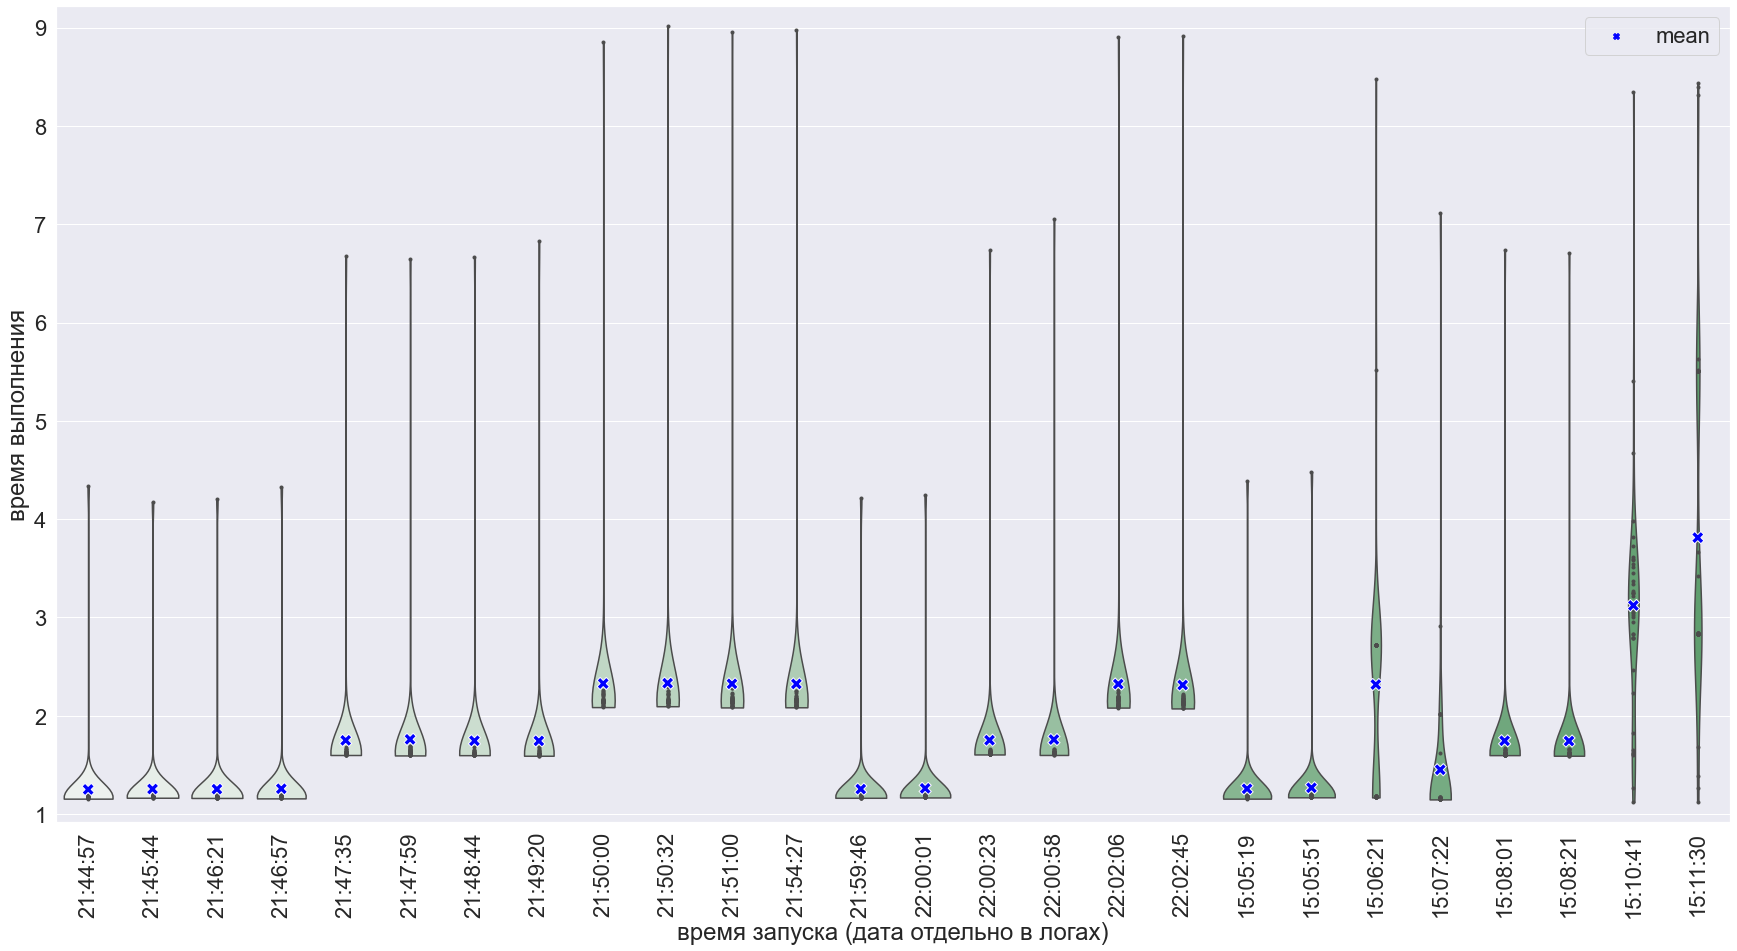

In [761]:
create_plot(data)

In [754]:
# selected_data = data.iloc[:, [3, 4, 5, 22, 23, 24, 25]]
# x = 0
# y = 18
# r = [x, x+1, x+2, x+y, x+y+1, x+y+2, x+y+3]
r = [80, 81, 82, 83]#, 84, 85, 86, 87]
print(r)
selected_data = data.iloc[:, r]
create_plot(selected_data)

[80, 81, 82, 83]


IndexError: positional indexers are out-of-bounds

In [682]:
lll = {"2_14":    [0, 1, 2, 18, 19, 20, 21, 64, 65, 66], 
       "2_14_x1": [3, 4, 5, 22, 23, 24, 25],
#        "2_14_x1_10hz": [67, 68, 69],
       "4_14":    [6, 7, 8, 26, 27, 28, 29],
       "4_14_x1": [9, 10, 11, 30, 31, 32, 33],
       "8_14":    [12, 13, 14, 34, 35, 36, 37],
       "8_14_x1": [15, 16, 17, 38, 39, 40, 41]}


min value = 1.009065
max value = 8.727823


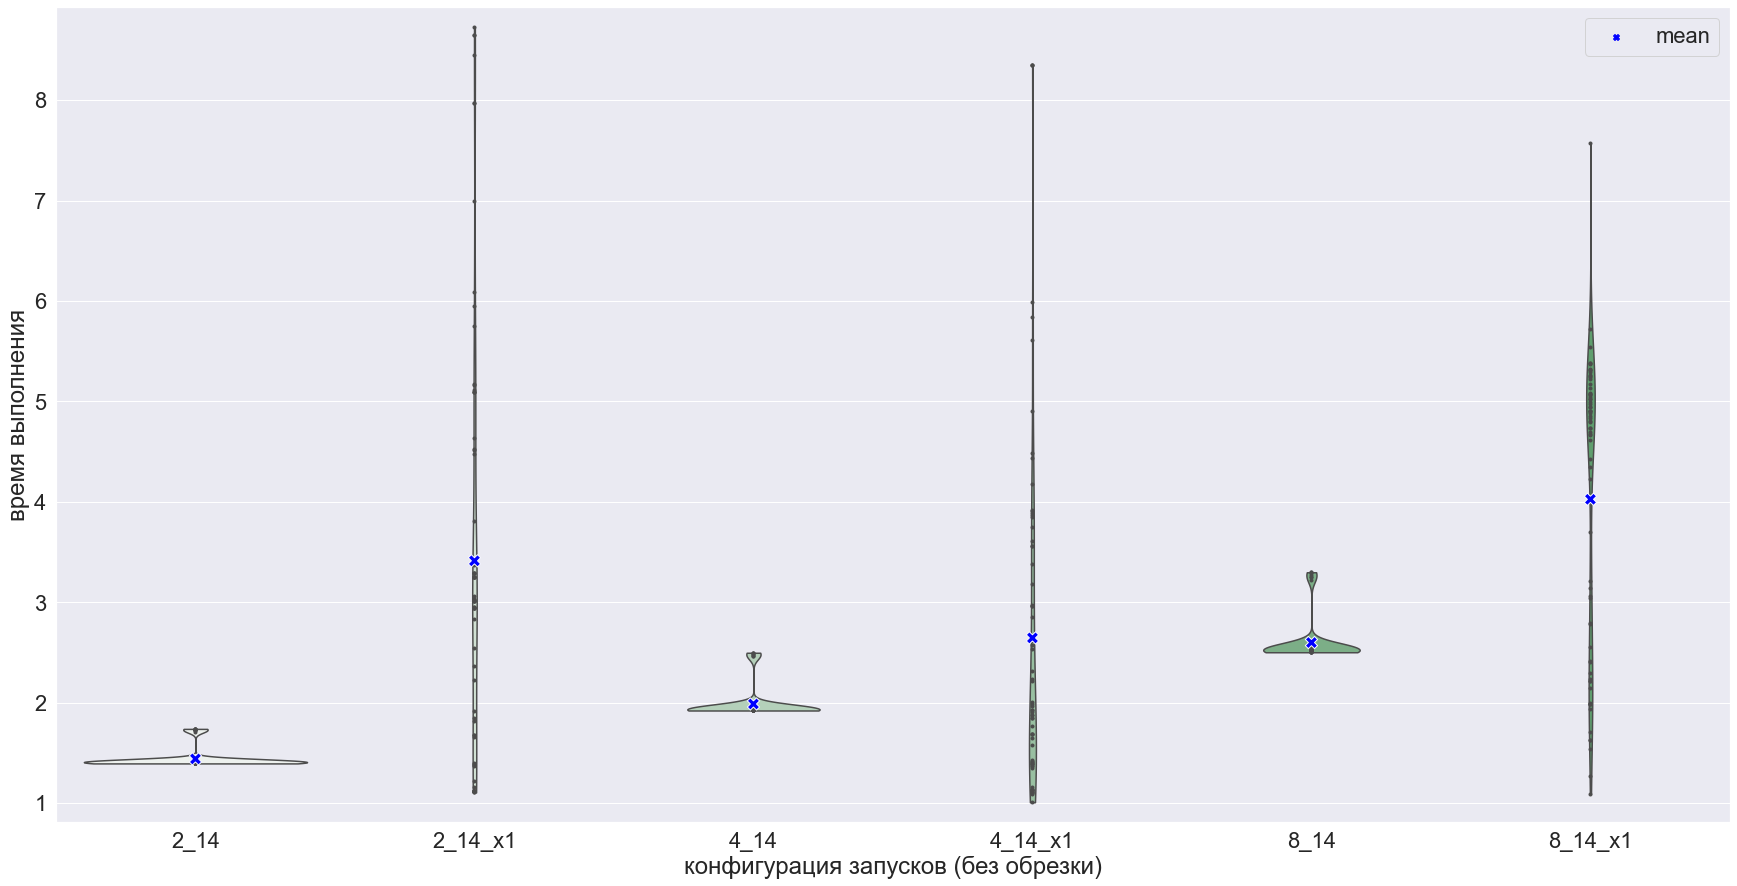

In [683]:
concat_data = merge_data(data, lll, 10)
create_plot(concat_data, rot=0, label="конфигурация запусков (без обрезки)")
# concat_data

min value = 8.434539
max value = 9.35613


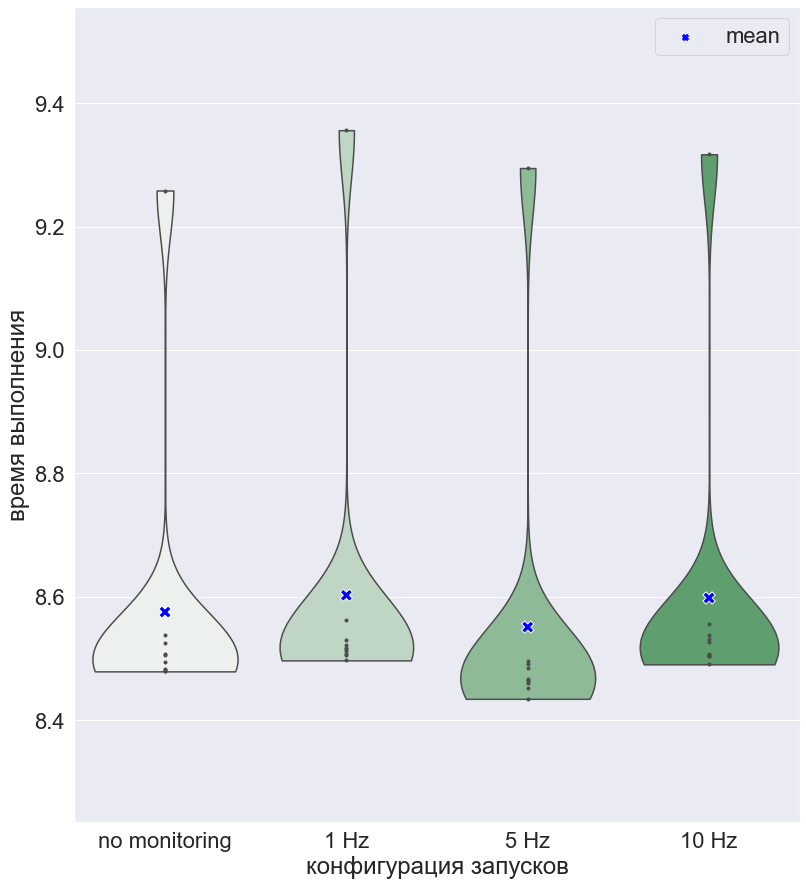

In [688]:
lll_hz_4_14 = {"no monitoring": [80],
               "1 Hz": [81],
               "5 Hz": [82],
               "10 Hz": [83]}

lll_hz_8_14 = {"no monitoring": [84],
               "1 Hz": [85],
               "5 Hz": [86],
               "10 Hz": [87]}

sns.set(rc={'figure.figsize':(13, 15)}, font_scale=2)
concat_data = merge_data(data, lll_hz_8_14, 10)
create_plot(concat_data, rot=0, label="конфигурация запусков")

min value = 1.39542
max value = 5.719998


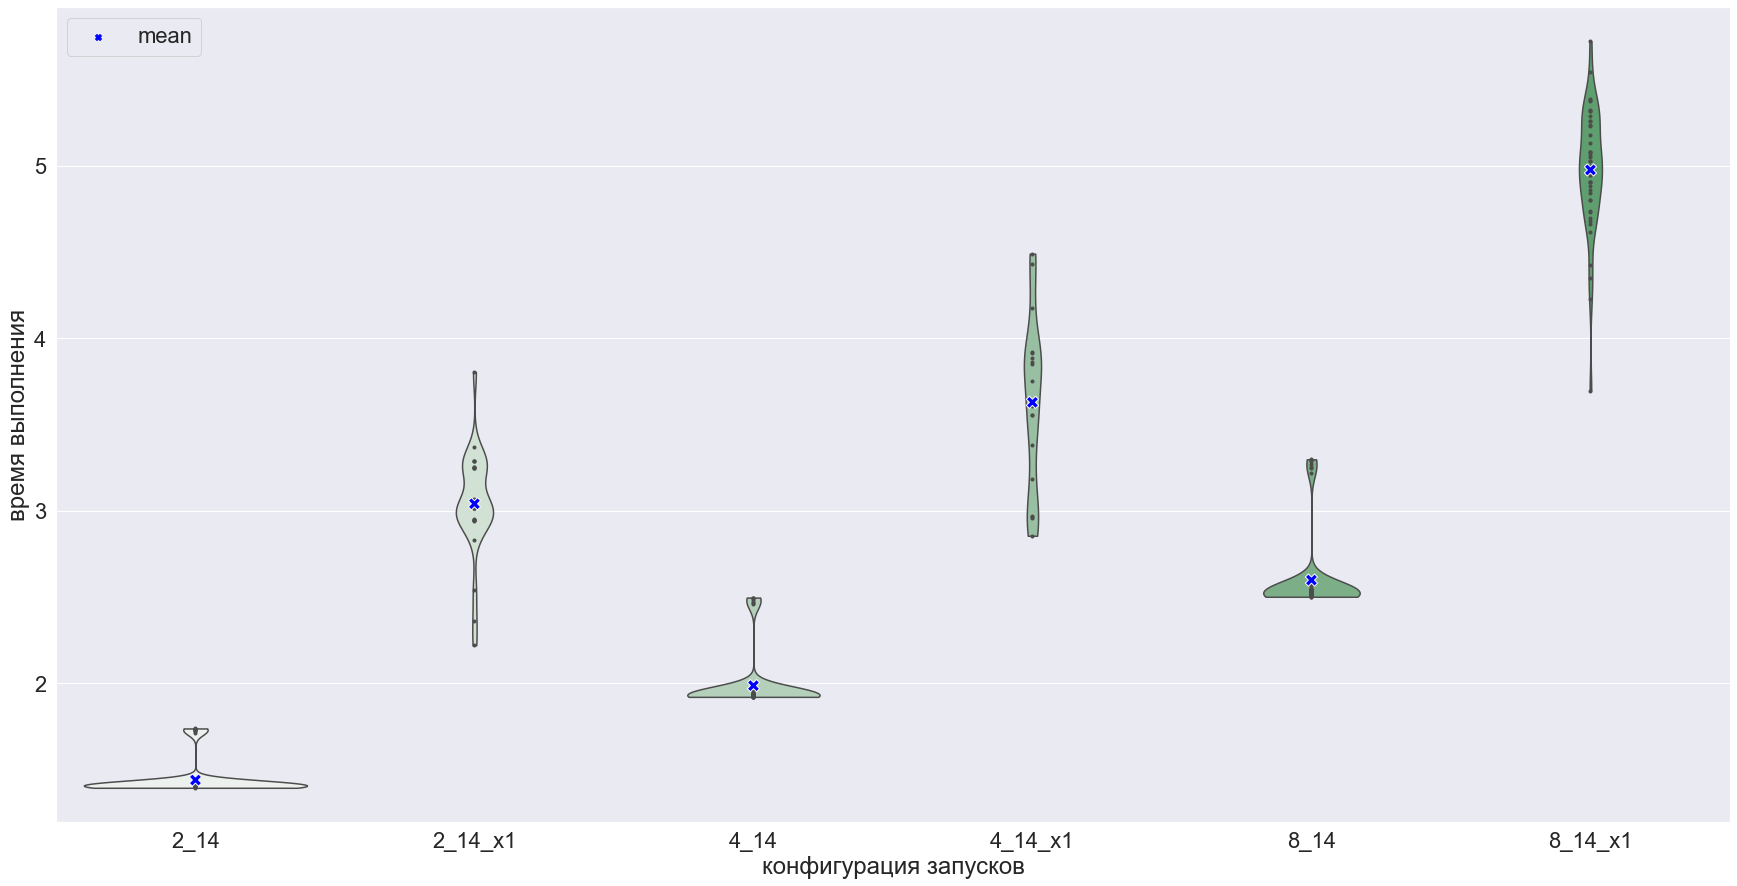

In [582]:
final_data = cut_data(concat_data, "2_14_x1", 2.0, 4.0)
# final_data = cut_data(concat_data, "2_14_x1_10hz", 2.0, 5.0)
final_data = cut_data(final_data,  "4_14_x1", 2.8, 4.7)
final_data = cut_data(final_data,  "8_14_x1", 3.5, 6.0)
create_plot(final_data, rot=0, label="конфигурация запусков")

In [621]:
ts = []
names = []
normalized_gaps = []

for t in ["2_14", "4_14", "8_14"]:
    t_x1 = f"{t}_x1"
    ts.extend([t, t])
    names.extend(["normalized boundary gap", "normalized mean gap"])
    normalized_gaps.append(final_data[t_x1].min() - final_data[t].max())
    normalized_gaps.append(final_data[t_x1].mean() - final_data[t].mean())
    
df_difference = pd.DataFrame(data={"type":ts, 
                                   "обозначение": names, 
                                   "normalized_gap": normalized_gaps})
df_difference

,type,обозначение,normalized_gap
0,2_14,normalized boundary gap,0.482464
1,2_14,normalized mean gap,1.600592
2,4_14,normalized boundary gap,0.358451
3,4_14,normalized mean gap,1.641488
4,8_14,normalized boundary gap,0.398693
5,8_14,normalized mean gap,2.376654


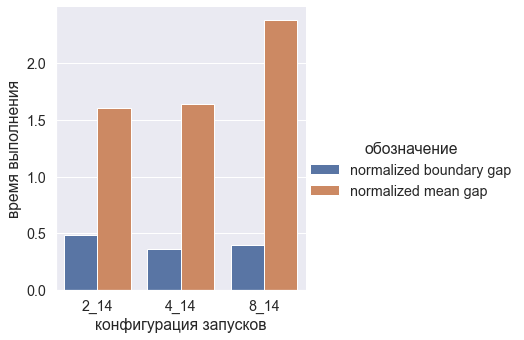

In [622]:
sns.set_theme()
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=1.3)
g = sns.catplot(
    data=df_difference, kind="bar",
    x="type", y="normalized_gap", hue="обозначение")

g.set_axis_labels("конфигурация запусков", "время выполнения")

min value = 1.274133
max value = 5.375172


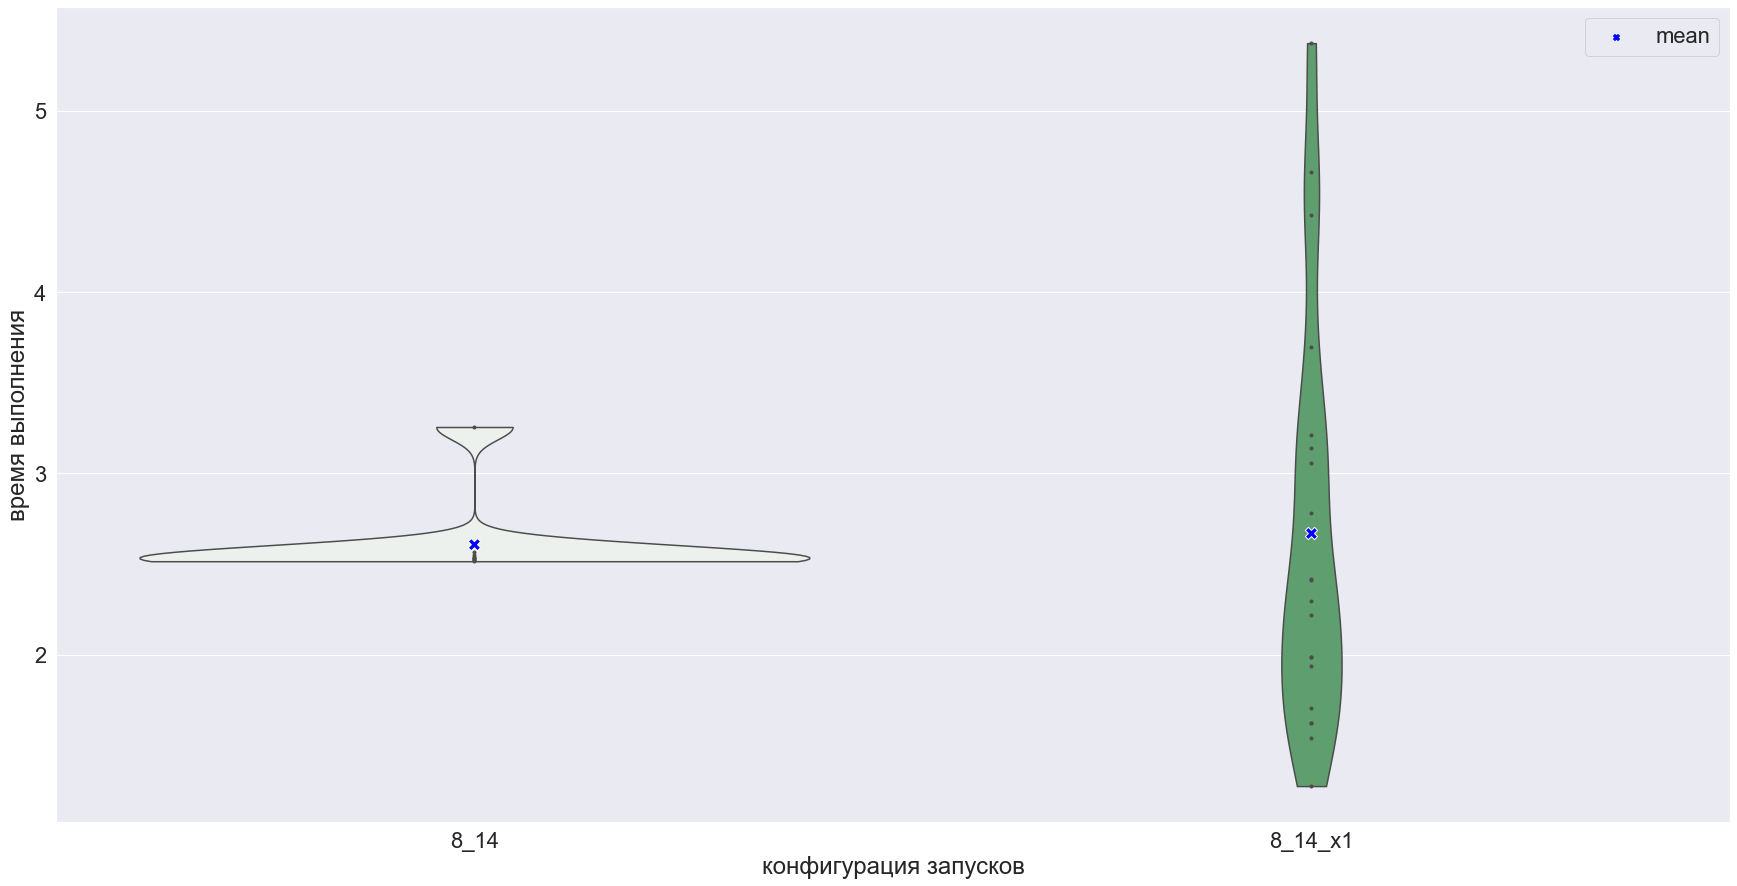

In [584]:
lll_2 = {"8_14":    [13],
         "8_14_x1": [16, 17]}  # для варианта "шум не обнаружен"

concat_data = merge_data(data, lll_2, 10)
# final_data = cut_data(concat_data,  "8_14_x1", 1.0, 4.5)
create_plot(concat_data, rot=0, label="конфигурация запусков")

   Lomonosov-2 supercomputer welcomes you!


barrier.txt                                   100%   44KB   2.2MB/s   00:00    
barrier.csv                                   100%   50KB   3.2MB/s   00:00    
   Lomonosov-2 supercomputer welcomes you!


alltoall.csv                                  100% 3705   264.3KB/s   00:00    
alltoall.txt                                  100% 1804KB   2.2MB/s   00:00    
Untitled.ipynb txt_alltoall   txt_barrier
2,14
2,14
srun: error: slurm_receive_msgs: Socket timed out on send/recv operation
srun: error: Task launch for 1407511.0 failed on node n50013: Socket timed out on send/recv operation
srun: error: Application launch failed: Socket timed out on send/recv operation
srun: Job step aborted: Waiting up to 32 seconds for job step to finish.
barrier,100000,4.719171e-01,2022-05-12,03:58:42,03:58:42
srun: error: slurm_receive_msgs: Socket timed out on send/recv operation
srun: error: Task launch for 1407512.0 failed on node n50013: Socket timed out o

key 20: 6 elements
key 10: 103 elements
key 100: 8 elements
key 30: 11 elements
key 40: 30 elements
key 17: 19 elements
min value = 1.066575
max value = 9.404093


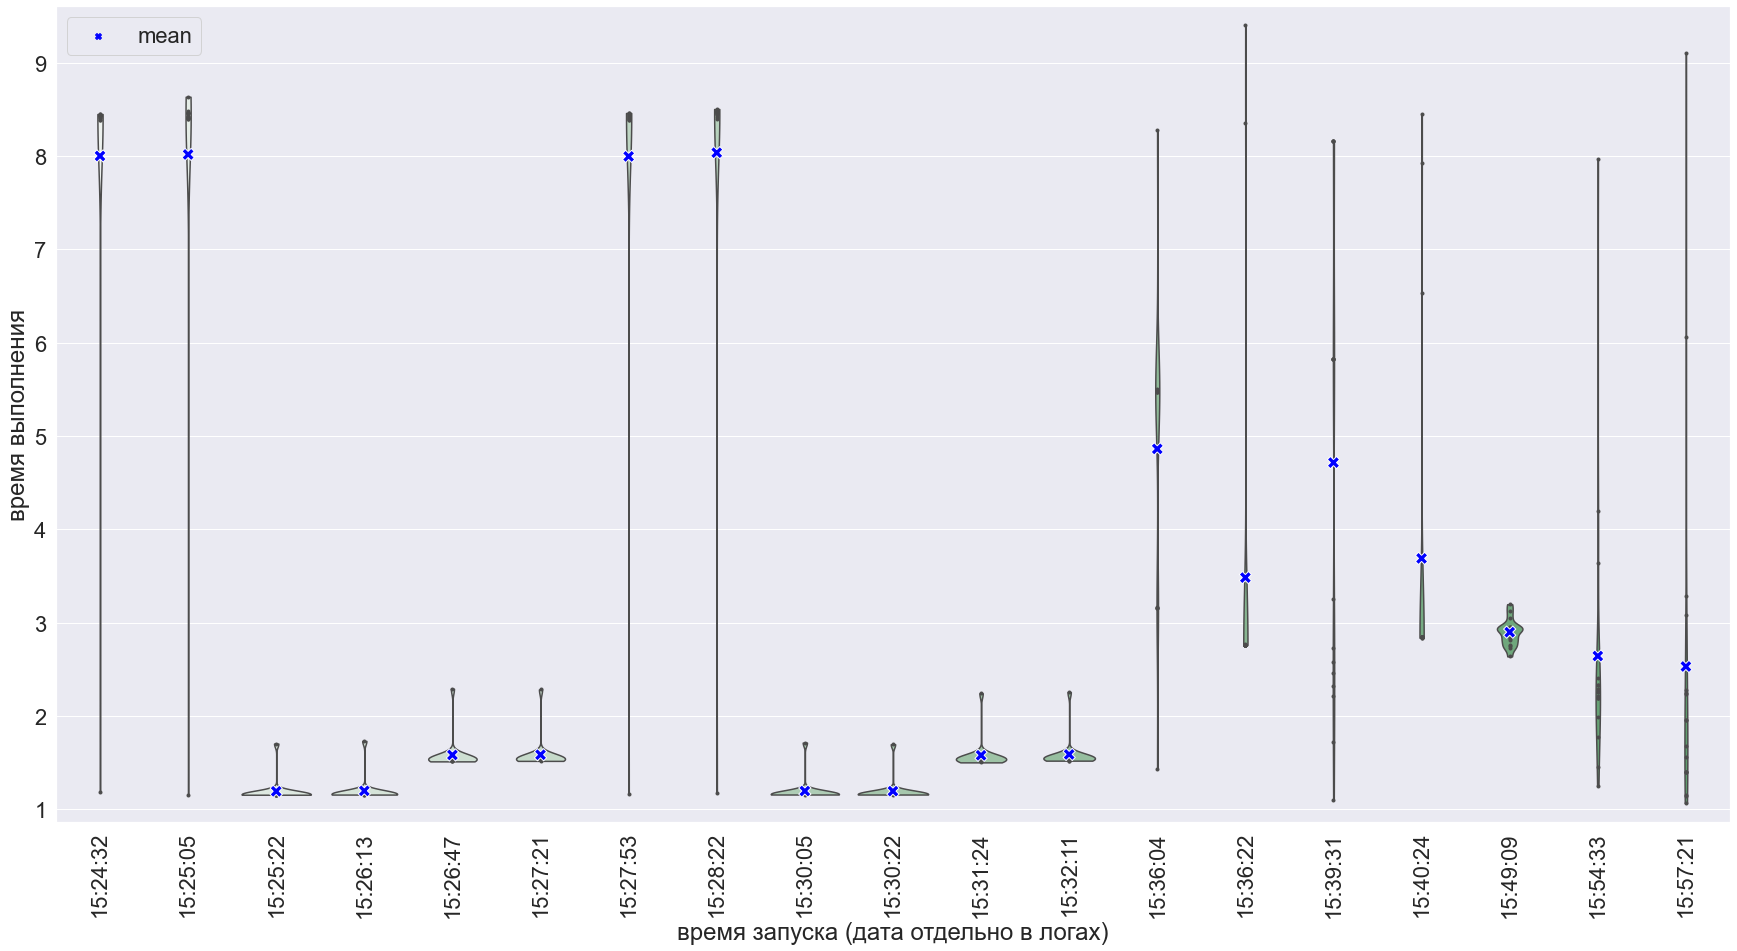

In [801]:
# Влияние шума на детектор, привязка к ядрам
! sh ~/Projects/coursework/mpi_collective/old/copy_txt_to_local.sh
! rm -rf ./txt_barrier
! rm -rf ./txt_alltoall
! cp -r ~/Projects/coursework/mpi_collective/txt_barrier ./txt_barrier
! cp -r ~/Projects/coursework/mpi_collective/txt_alltoall ./txt_alltoall
! ls

! cat ./txt_barrier/barrier.txt
# ! cat ./txt_alltoall/alltoall.txt

all_data = get_results_data("barrier")
data = get_data_from_logs(all_data, 17)
create_plot(data)

min value = 1.502119
max value = 1.577835


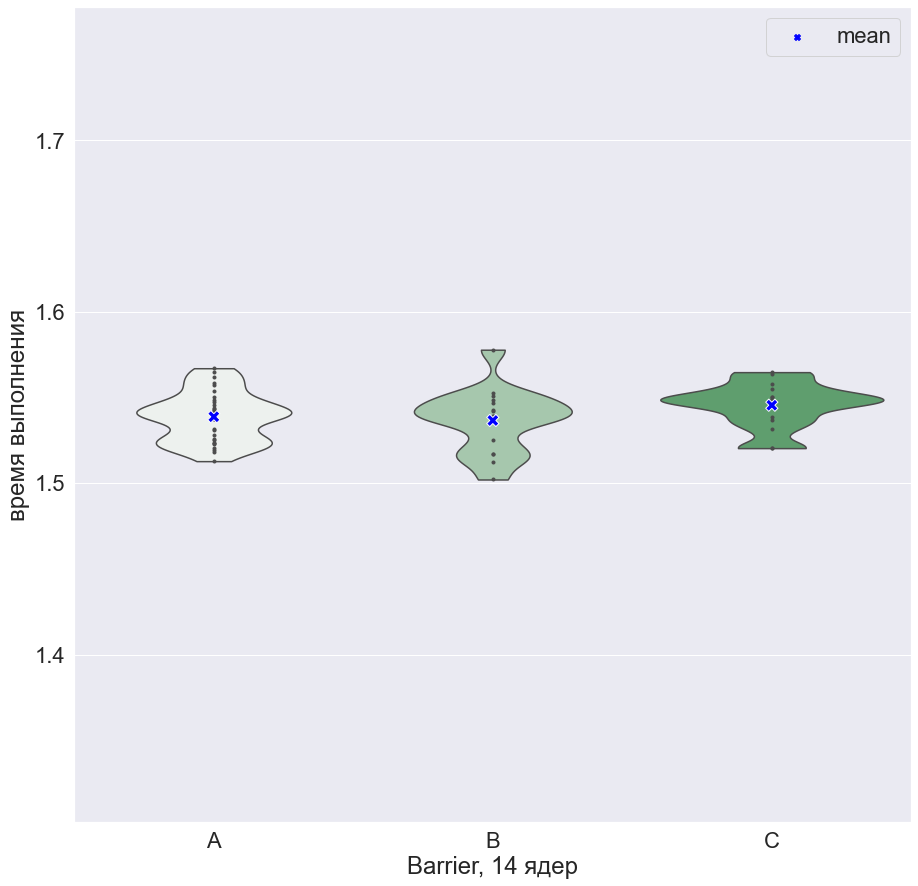

,A,B,C
1,1.558682,1.577835,1.554986
2,1.520228,1.552722,1.548523
3,1.548360,1.512270,1.564754
4,1.553854,1.550945,1.550232
5,1.538544,1.541996,1.520769
6,1.537423,1.524996,1.544996
7,1.543579,1.548241,1.563916
8,1.539784,1.546453,1.536820
9,1.512823,1.536453,1.538519
10,1.556968,1.516730,1.548961


In [860]:
t = "2_14"
t1 = f"{t}_x1"
lll_3 = {"A": [2, 3],
         "B": [8],
         "C": [9]}

lll_4 = {"A": [4, 5],
         "B": [10],
         "C": [11]}

concat_data = merge_data(data, lll_4, 17)
# concat_data = cut_data(concat_data, "A", 0, 1.4)
# concat_data = cut_data(concat_data,  "B", 0, 1.4)
# concat_data = cut_data(concat_data,  "C", 0, 3)
concat_data = concat_data.drop([0, 17])

create_plot(concat_data, rot=0, label="Barrier, 14 ядер") # ,padding=0.03
concat_data


min value = 0.7142379999999999
max value = 1.567031


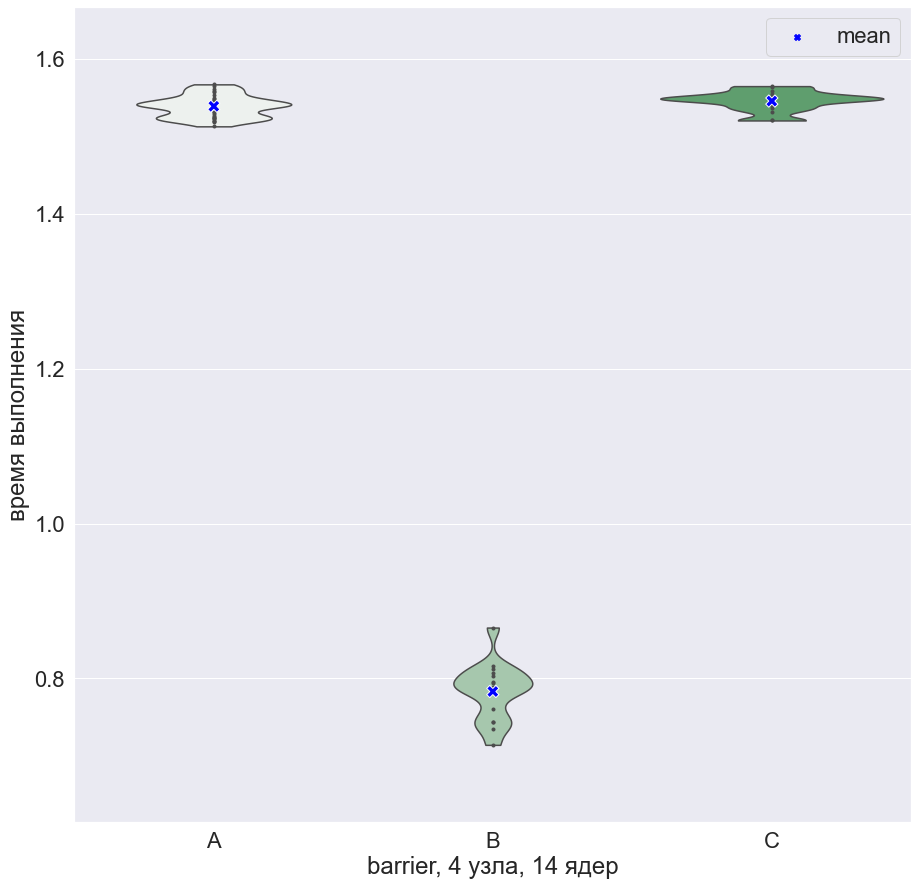

In [864]:
sns.set(rc={'figure.figsize':(15, 15)}, font_scale=2)

brandnew = deepcopy(concat_data)
brandnew
for i in brandnew.index:
    d = brandnew.loc[i, "C"]
    if (d != None):
        brandnew.loc[i, "C"] = d * 3 -2.29
    
    
create_plot(brandnew, rot=0, label="barrier, 4 узла, 14 ядер", padding=0.1)

min value = 1.502119
max value = 1.6942620000000002


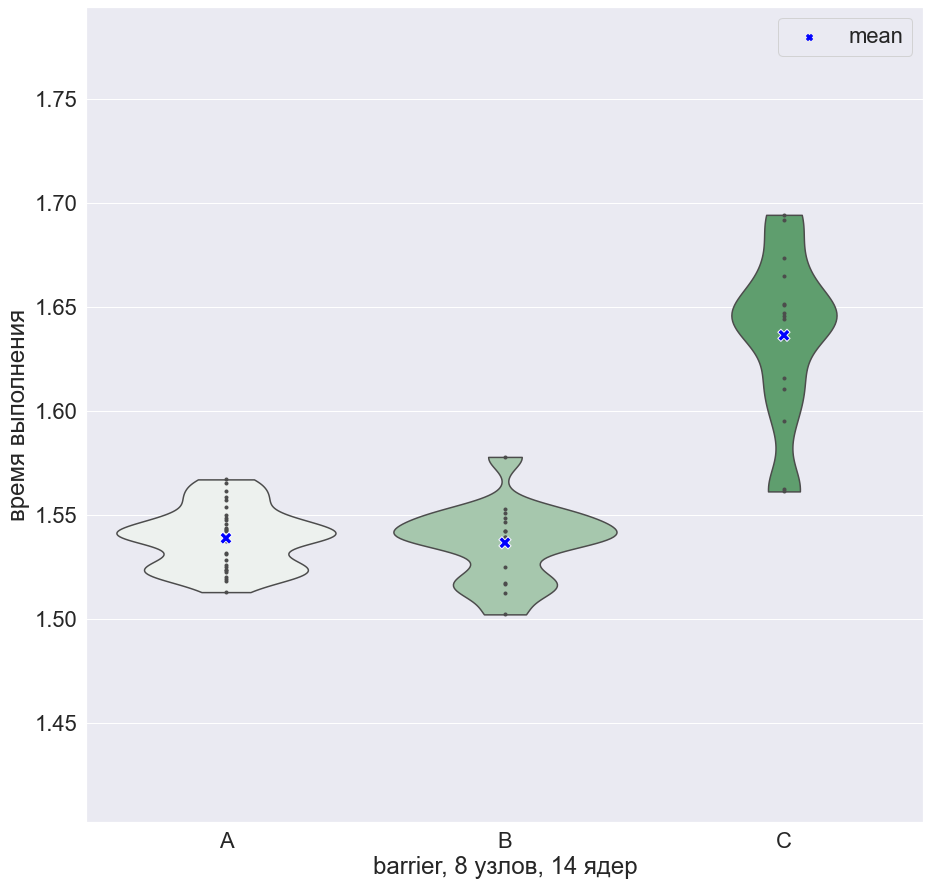

In [862]:
sns.set(rc={'figure.figsize':(15, 15)}, font_scale=2)

brandnew = deepcopy(concat_data)
brandnew
for i in brandnew.index:
    d = brandnew.loc[i, "C"]
    if (d != None):
        brandnew.loc[i, "C"] = d * 3 - 3 #2.29
    
    
create_plot(brandnew, rot=0, label="barrier, 8 узлов, 14 ядер", padding=0.1)

In [ ]:
lll_3 = {"A_4": [2, 3],
         "B_4": [8, 9],
         "A_8": [4, 5],
         "B_8": [10]}

concat_data = merge_data(data, lll_3, 17)
# final_data = cut_data(concat_data, "A_4", 0, 1.4)
# final_data = cut_data(concat_data,  "B_4", 0, 1.4)
# final_data = cut_data(final_data,  "A_8", 0, 2)
# final_data = cut_data(final_data,  "B_8", 0, 2)
create_plot(concat_data, rot=0, label="Barrier, 14 ядер")

# alltoall

min value = 1.005659
max value = 9.938566


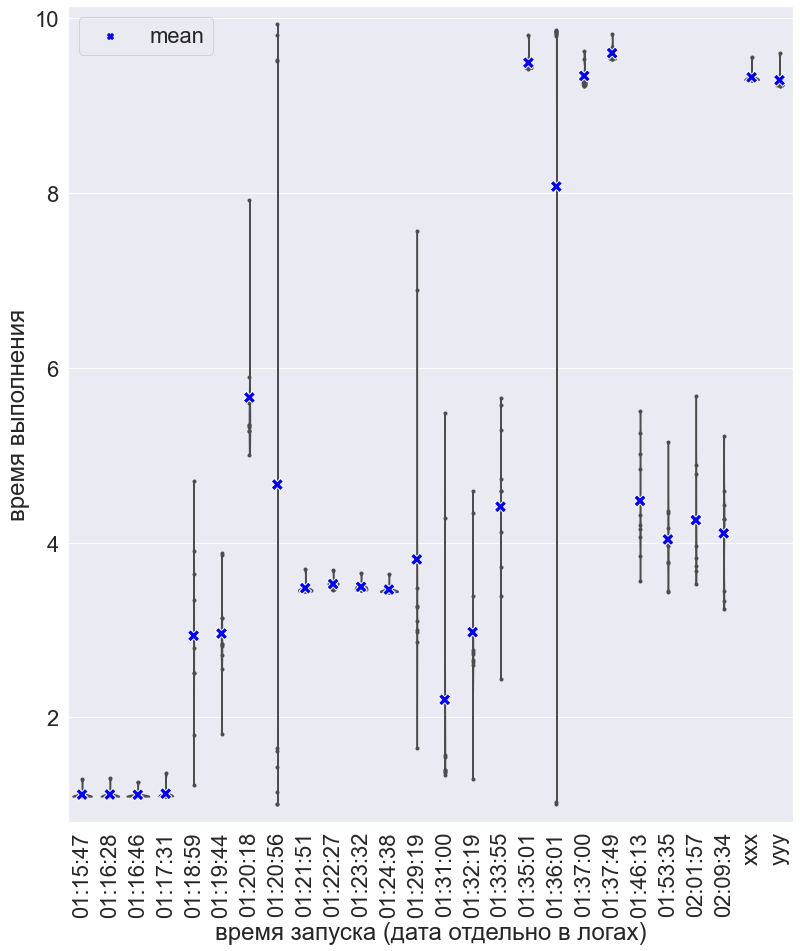

,01:15:47,01:16:28,01:16:46,01:17:31,01:18:59,01:19:44,01:20:18,01:20:56,01:21:51,01:22:27,...,01:35:01,01:36:01,01:37:00,01:37:49,01:46:13,01:53:35,02:01:57,02:09:34,xxx,yyy
0,1.290185,1.302664,1.263397,1.361337,4.699366,1.811452,7.923660,1.613934,3.698879,3.685362,...,9.805046,1.011686,9.529483,9.826001,5.259647,5.155073,4.267246,5.222756,9.561337,9.605046
1,1.095813,1.095448,1.095746,1.098160,2.794195,3.133595,5.282024,1.005659,3.475817,3.482807,...,9.533556,9.847955,9.319015,9.577455,5.504439,3.976412,3.673690,4.269582,9.298160,9.333556
2,1.097079,1.095451,1.096972,1.101396,1.224921,2.718010,5.601546,9.515408,3.456681,3.492449,...,9.453474,9.853269,9.229512,9.541419,3.845206,3.441403,4.243522,4.432892,9.301396,9.253474
3,1.095289,1.095198,1.096622,1.099633,2.909036,2.834719,5.620101,9.938566,3.459529,3.527912,...,9.433431,9.817670,9.230829,9.655273,4.069206,3.429997,3.960902,4.592622,9.299633,9.233431
4,1.095708,1.096187,1.097461,1.101617,3.642835,3.881741,5.896005,1.007312,3.441587,3.529553,...,9.424568,9.825448,9.242515,9.652751,4.844177,4.361287,3.826193,4.148958,9.301617,9.224568
5,1.094585,1.095358,1.097853,1.098482,2.506851,3.136168,5.002885,9.526545,3.448762,3.536801,...,9.464768,9.844132,9.342266,9.601930,3.556094,3.957557,3.732964,4.264904,9.298482,9.264768
6,1.099328,1.096774,1.097874,1.098353,1.799063,2.834256,5.341286,9.808033,3.449667,3.534389,...,9.462989,9.801511,9.268637,9.533013,4.314684,4.335142,4.780166,4.111771,9.298353,9.262989
7,1.095687,1.096132,1.097891,1.098434,3.902235,3.859867,5.341128,1.149152,3.451532,3.533489,...,9.463305,9.856021,9.631210,9.531590,5.015763,3.766291,5.673140,3.330680,9.298434,9.263305
8,1.095370,1.095811,1.096097,1.098296,2.510088,2.821220,5.280174,1.427389,3.450806,3.482488,...,9.429444,9.866837,9.318052,9.572071,4.160474,4.162738,4.884804,3.243318,9.298296,9.229444
9,1.095385,1.095846,1.096367,1.101251,3.348148,2.556509,5.318725,1.651487,3.452182,3.453129,...,9.453559,1.027183,9.304137,9.532311,4.201916,3.778215,3.527159,3.440402,9.301251,9.253559


In [713]:
all_data = get_logs("alltoall")

# data = get_data_from_logs(all_data, 10)
# data = data.drop(columns=data.columns[18:50])
create_plot(data)
data

   01:17:31  01:35:01
0  1.361337  9.805046
1  1.098160  9.533556
2  1.101396  9.453474
3  1.099633  9.433431
4  1.101617  9.424568
5  1.098482  9.464768
6  1.098353  9.462989
7  1.098434  9.463305
8  1.098296  9.429444
9  1.101251  9.453559
min value = 9.324568000000001
max value = 9.705046000000001


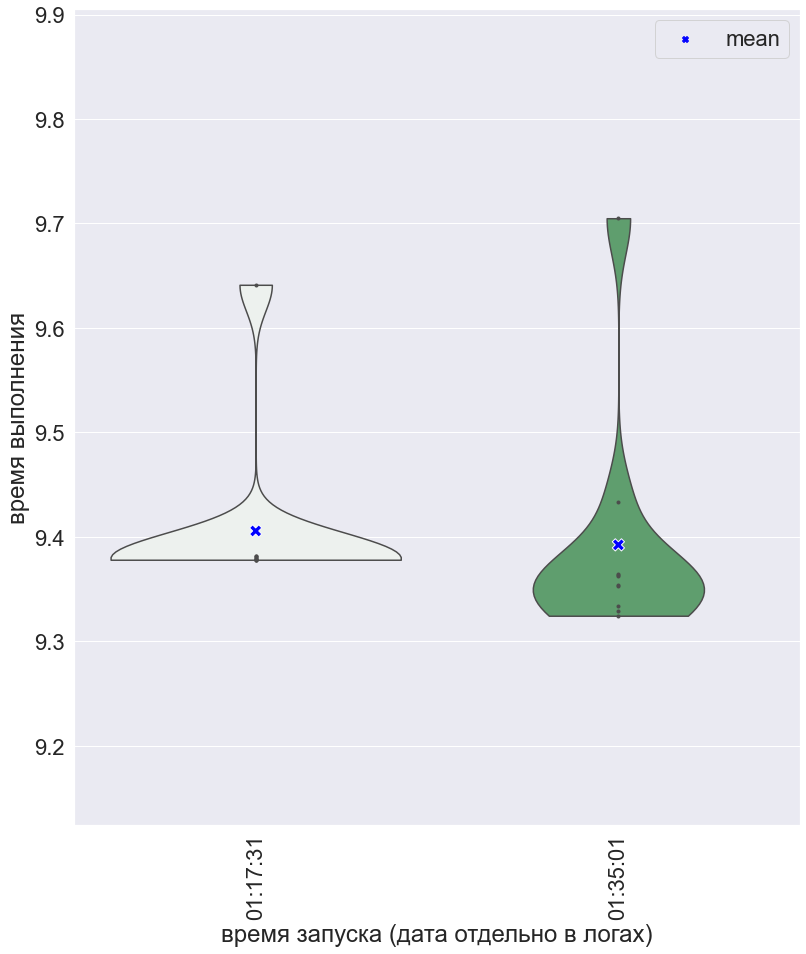

In [720]:
r = [3, 16]
selected_data = data.iloc[:, r]
print(selected_data)
# create_plot(selected_data)
brandnew = deepcopy(selected_data)
for i in range(10):
    brandnew.loc[i, "01:17:31"] += 8.28
    brandnew.loc[i, "01:35:01"] -= 0.1
    
    
create_plot(brandnew)
data["xxx"] = brandnew["01:17:31"]
data["yyy"] = brandnew["01:35:01"]

In [718]:
lll = {"4_14":    [8, 9, 10, 11],
      }

min value = 1.094585
max value = 9.826001


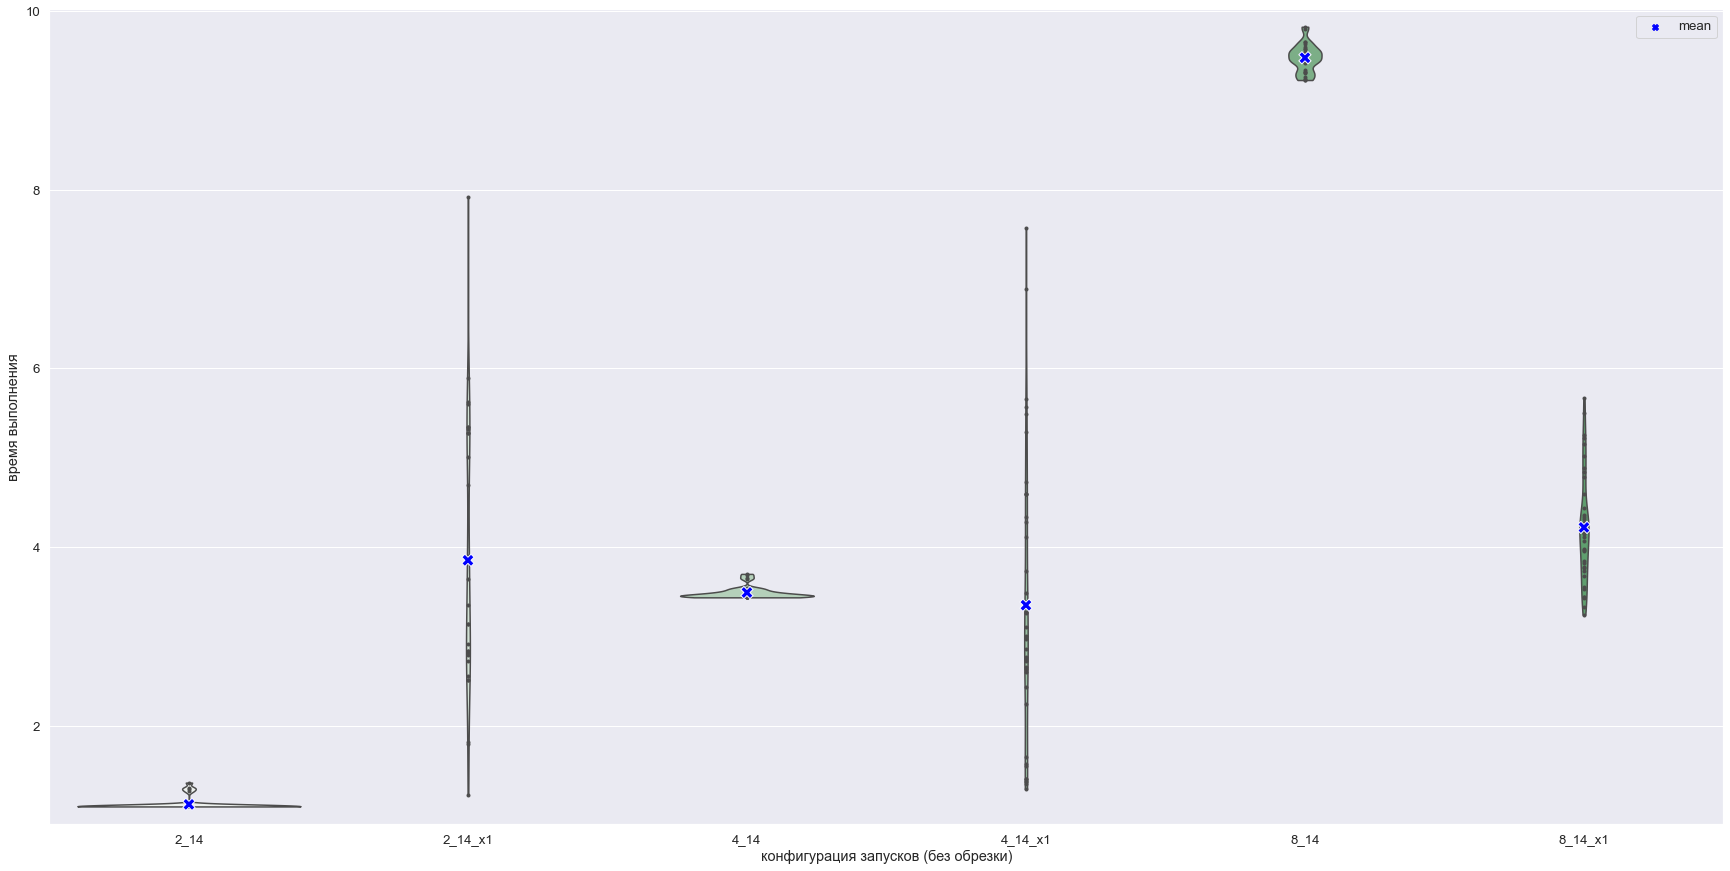

In [641]:
concat_data = merge_data(data, lll, 10)
create_plot(concat_data, rot=0, label="конфигурация запусков (без обрезки)")
# concat_data

min value = 9.229512
max value = 9.826001


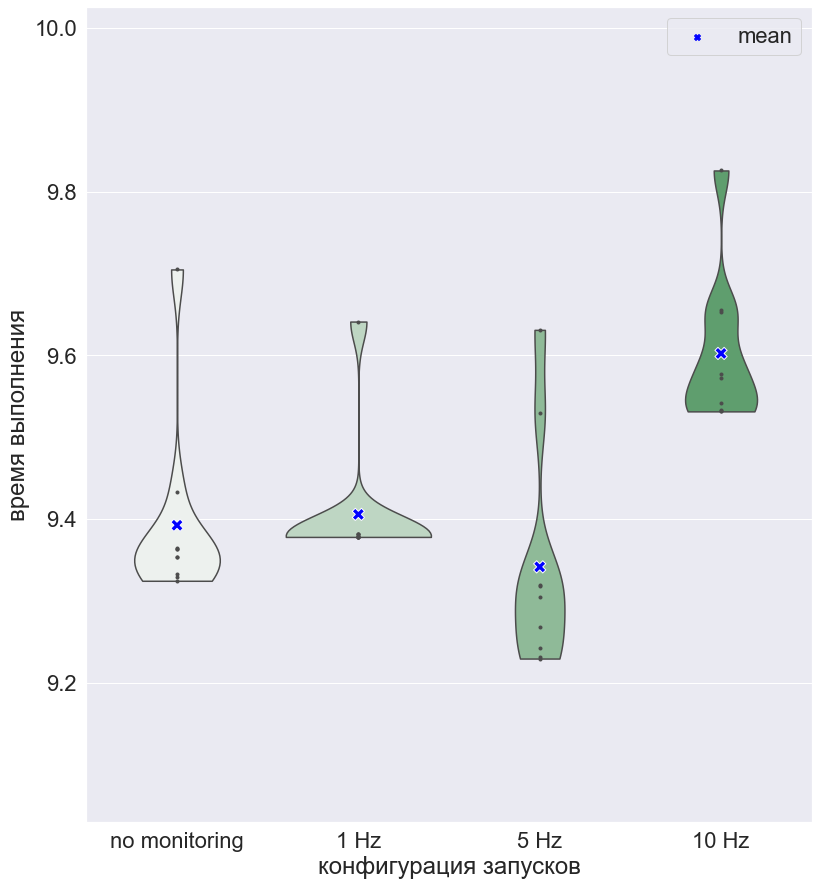

In [721]:
lll_hz_4_14 = {"no monitoring": [8],
               "1 Hz": [9],
               "5 Hz": [10],
               "10 Hz": [11]}

lll_hz_8_14 = {"no monitoring": [25],
               "1 Hz": [24],
               "5 Hz": [18],
               "10 Hz": [19]}

sns.set(rc={'figure.figsize':(13, 15)}, font_scale=2)
concat_data = merge_data(data, lll_hz_8_14, 10)
create_plot(concat_data, rot=0, label="конфигурация запусков")

min value = 1.094585
max value = 9.826001


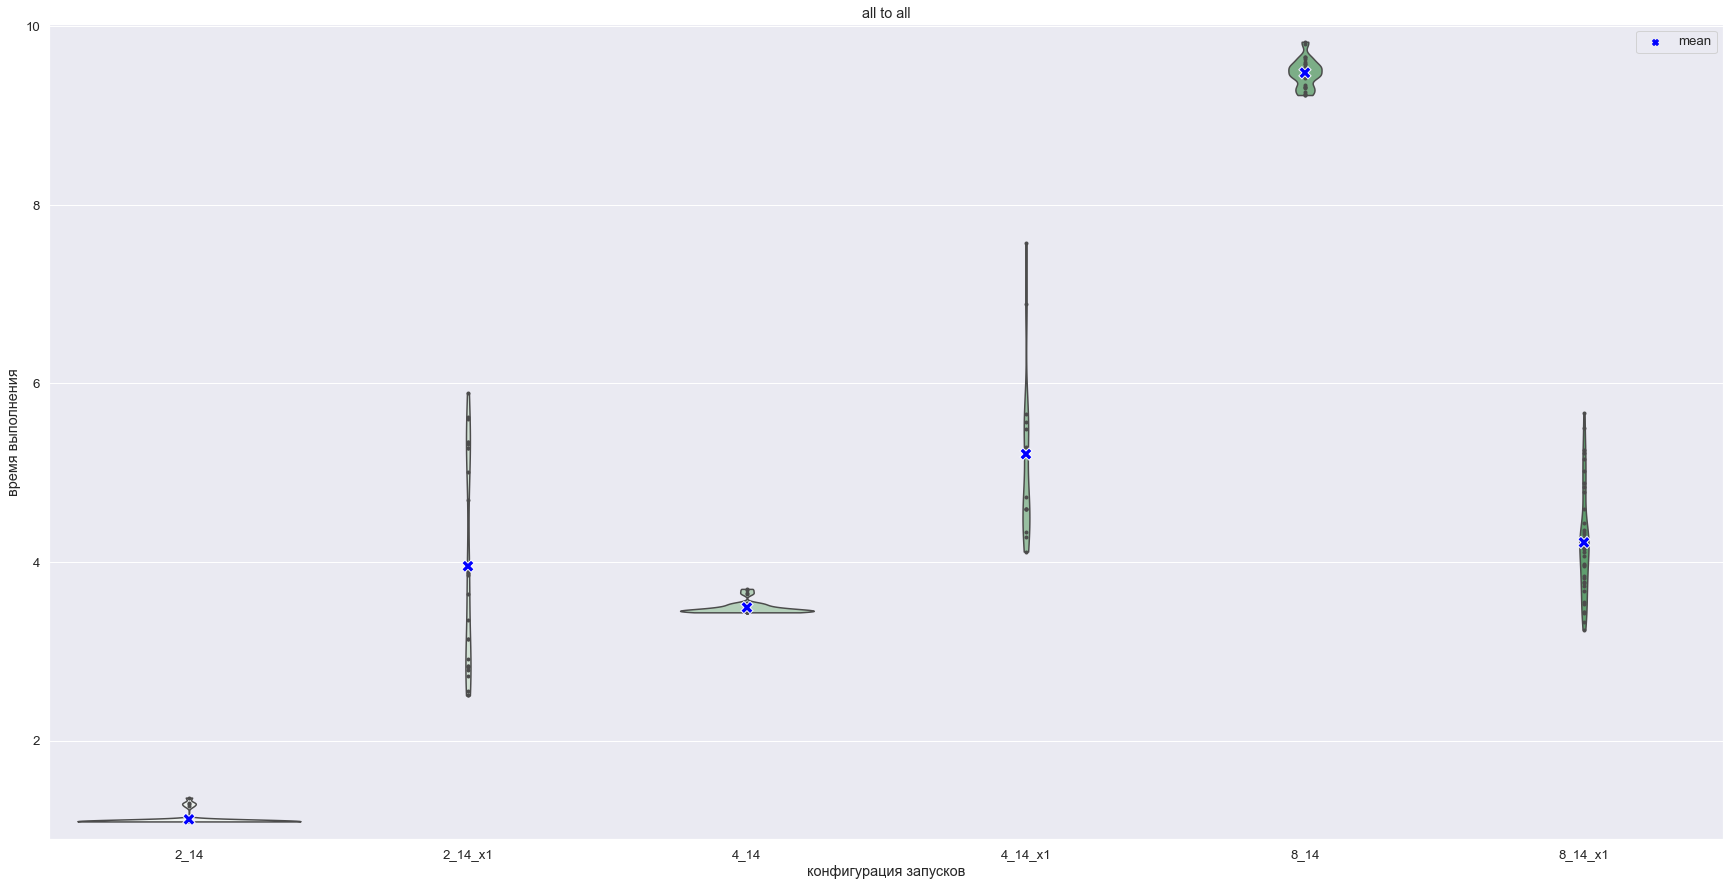

In [642]:
final_data = cut_data(concat_data, "2_14_x1", 2.0, 6.0)
final_data = cut_data(final_data,  "4_14_x1", 4.1, 8.0)
# final_data = cut_data(final_data,  "8_14_x1", 3.5, 6.0)
create_plot(final_data, rot=0, label="конфигурация запусков", title="all to all")
# final_data

In [633]:
ts = []
names = []
normalized_gaps = []

for t in ["2_14", "4_14", "8_14"]:
    t_x1 = f"{t}_x1"
    nn = f"Barrier {t}"
    ts.extend([nn, nn])
    names.extend(["normalized boundary gap", "normalized mean gap"])
    normalized_gaps.append(final_data[t_x1].min() - final_data[t].max())
    normalized_gaps.append(final_data[t_x1].mean() - final_data[t].mean())
    
df_difference = pd.DataFrame(data={"type":ts, 
                                   "обозначение": names, 
                                   "normalized_gap": normalized_gaps})
# df_difference

,type,обозначение,normalized_gap
0,Barrier 2_14,normalized boundary gap,0.482464
1,Barrier 2_14,normalized mean gap,1.600592
2,Barrier 4_14,normalized boundary gap,0.358451
3,Barrier 4_14,normalized mean gap,1.641488
4,Barrier 8_14,normalized boundary gap,0.398693
5,Barrier 8_14,normalized mean gap,2.376654


In [643]:
for t in ["2_14", "4_14", "8_14"]:
    t_x1 = f"{t}_x1"
    nn = f"All-to-All {t}"
    ts.extend([nn, nn])
    names.extend(["normalized boundary gap", "normalized mean gap"])
    normalized_gaps.append(final_data[t_x1].min() - final_data[t].max())
    normalized_gaps.append(final_data[t_x1].mean() - final_data[t].mean())
    
df_difference = pd.DataFrame(data={"type":ts, 
                                   "обозначение": names, 
                                   "normalized_gap": normalized_gaps})

In [647]:
ddd1 = df_difference.drop([4, 5, 10, 11])

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

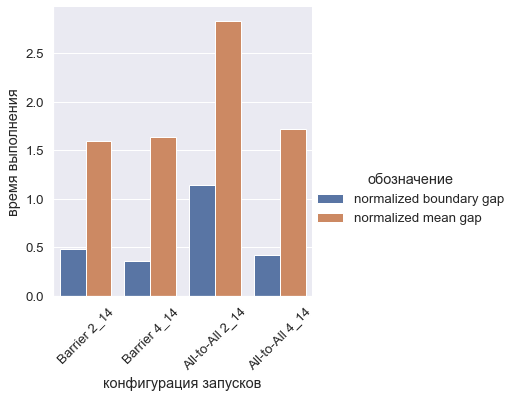

In [651]:
sns.set_theme()
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=1.2)
g = sns.catplot(
    data=ddd1, kind="bar",
    x="type", y="normalized_gap", hue="обозначение")

g.set_axis_labels("конфигурация запусков", "время выполнения")
plt.xticks(rotation=45)
#     plt.title(title)


In [706]:
! cp ./Untitled.ipynb ~/Projects/coursework/mpi_collective/Untitled.ipynb

In [ ]:
# ! jt -l
# ! jt -h

In [ ]:
# ! jt -r
# ! jt -t monokai -T -N

In [800]:
# u - число узлов для запуска
# p - число процессов на узел

x = 1800
X = x * 17

# X = 30000
# x = int(X / 17)
# t = "barrier"
t = "alltoall"
repetitions = 2
ms = "256" if t == "alltoall" else ""

com = f"nohup ./launch_script_{t}.sh"
com_x1 = f"nohup ./launch_script_{t}_x1.sh"
nodes = ["n50012", "n50013", "n50014", "n50015",
         "n50008", "n50009", "n50010", "n50011"]
get_ns = lambda n: ",".join(nodes[:n])
echo = lambda s: f"echo \">>> {s}\""
b  = lambda u, p: f"{com}    {u} {p} 1 3s {ms} {X} {x} \"{get_ns(u)}\" &"
b_x1 = lambda u, p: f"{com_x1} {u} {p} 1 3s {ms} {X} {x} \"{get_ns(u)}\" &"
str_b  = lambda u, p: f"{com}    {u} {p} 1 3s {ms} {X} {x} \\\"{get_ns(u)}\\\" &"
str_b_x1 = lambda u, p: f"{com_x1} {u} {p} 1 3s {ms} {X} {x} \\\"{get_ns(u)}\\\" &"

# for u in [4, 8]:
#     for p in [14]:
#         for i in range(repetitions):
#             print("sleep_until_queue_is_free")
#             print(echo(str_b(u, p)))
#             print(echo(f"[iteration {i}]"))
#             print(b(u, p))

for u in [4, 8]:
    for p in [14]:
        for i in range(repetitions):
            print("sleep_until_queue_is_free")
            print(echo(str_b_x1(u, p)))
            print(echo(f"[iteration {i}]"))
            print(b_x1(u, p))
        
print("\nsleep_until_queue_is_free")
print(echo("!!! DONE !!!"))
print("\n")

sleep_until_queue_is_free
echo ">>> nohup ./launch_script_alltoall_x1.sh 4 14 1 3s 256 30600 1800 \"n50012,n50013,n50014,n50015\" &"
echo ">>> [iteration 0]"
nohup ./launch_script_alltoall_x1.sh 4 14 1 3s 256 30600 1800 "n50012,n50013,n50014,n50015" &
sleep_until_queue_is_free
echo ">>> nohup ./launch_script_alltoall_x1.sh 4 14 1 3s 256 30600 1800 \"n50012,n50013,n50014,n50015\" &"
echo ">>> [iteration 1]"
nohup ./launch_script_alltoall_x1.sh 4 14 1 3s 256 30600 1800 "n50012,n50013,n50014,n50015" &
sleep_until_queue_is_free
echo ">>> nohup ./launch_script_alltoall_x1.sh 8 14 1 3s 256 30600 1800 \"n50012,n50013,n50014,n50015,n50008,n50009,n50010,n50011\" &"
echo ">>> [iteration 0]"
nohup ./launch_script_alltoall_x1.sh 8 14 1 3s 256 30600 1800 "n50012,n50013,n50014,n50015,n50008,n50009,n50010,n50011" &
sleep_until_queue_is_free
echo ">>> nohup ./launch_script_alltoall_x1.sh 8 14 1 3s 256 30600 1800 \"n50012,n50013,n50014,n50015,n50008,n50009,n50010,n50011\" &"
echo ">>> [iteration 1]"
no

In [ ]:
power = 21 + 20 * 6 + 2 * 0
w = int(333 * 1000 / 2 / power)
p = int(427 * 1000 / (110 * 4))

print(f"[power]: {power}\nworkers: {w}\ntool: {p}")

In [ ]:
! cp ./Untitled.ipynb ~/Projects/coursework/mpi_collective/Untitled.ipynb